In [340]:
print("hello")

hello


In [341]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
dataset=pd.read_csv("insurance.csv")

In [343]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [344]:
dataset.shape

(1338, 7)

In [345]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [346]:
dataset.iloc[45:70]

,age,sex,bmi,children,smoker,region,charges
45,55,male,37.300,0,no,southwest,20630.28351
46,18,female,38.665,2,no,northeast,3393.35635
47,28,female,34.770,0,no,northwest,3556.92230
48,60,female,24.530,0,no,southeast,12629.89670
49,36,male,35.200,1,yes,southeast,38709.17600
50,18,female,35.625,0,no,northeast,2211.13075
51,21,female,33.630,2,no,northwest,3579.82870
52,48,male,28.000,1,yes,southwest,23568.27200
53,36,male,34.430,0,yes,southeast,37742.57570
54,40,female,28.690,3,no,northwest,8059.67910


In [347]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [348]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [349]:
dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [350]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [351]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [352]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\gaura\AppData\Local\Temp\ipykernel_2436\190178349.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])


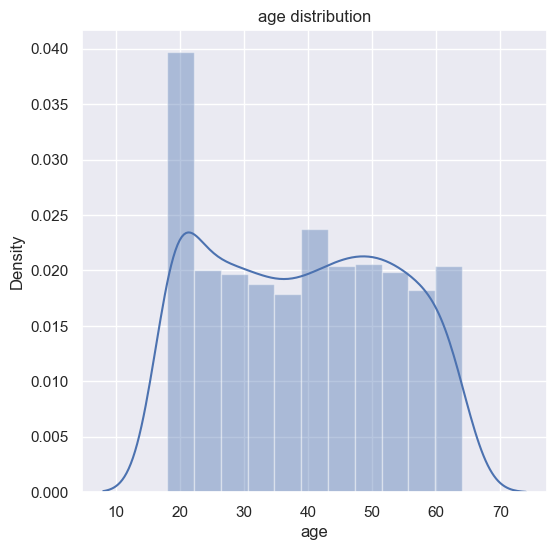

In [353]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset["age"])
plt.title("age distribution")
plt.show()

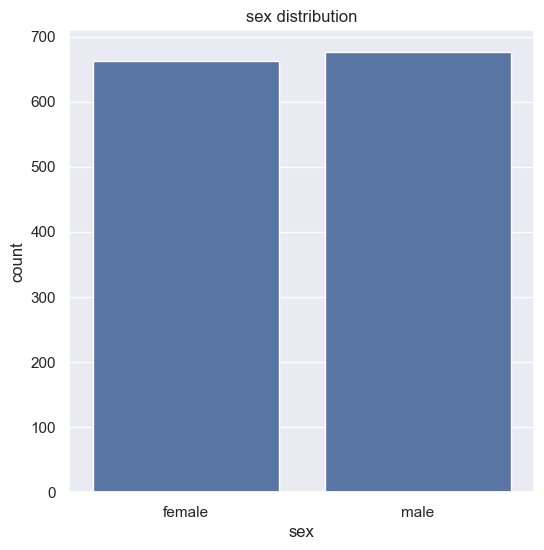

In [354]:

plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=dataset)
plt.title("sex distribution")
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_2436\4265065262.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["bmi"])


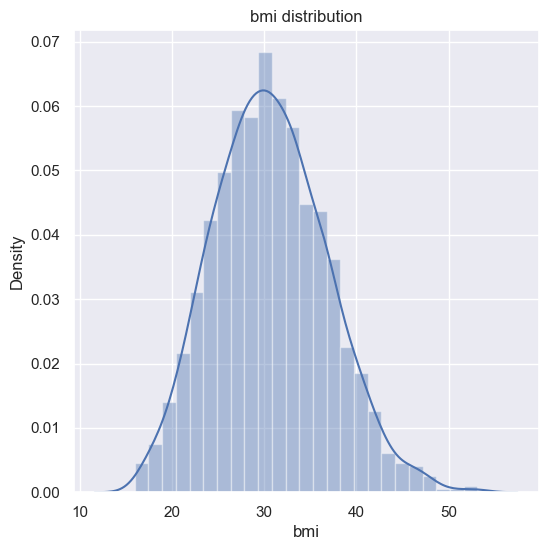

In [355]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset["bmi"])
plt.title("bmi distribution")
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_2436\1051314035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["children"])


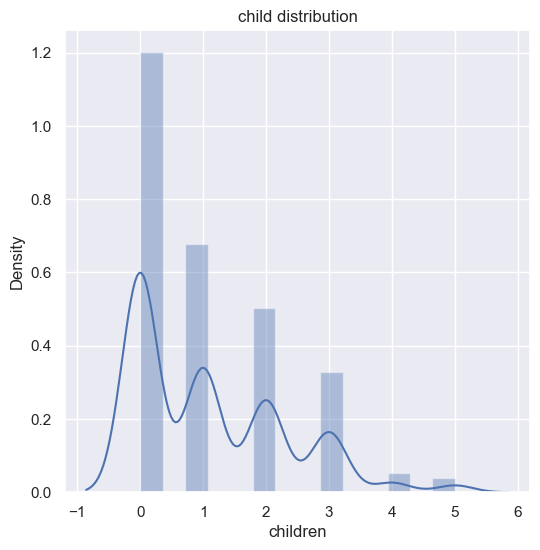

In [356]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset["children"])
plt.title("child distribution")
plt.show()

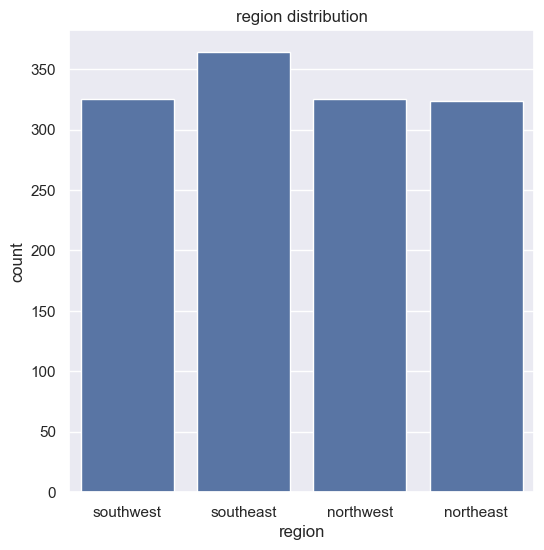

In [357]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=dataset)
plt.title("region distribution")
plt.show()

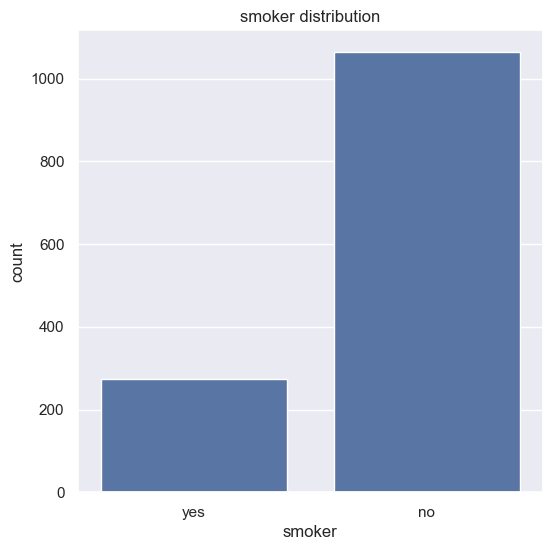

In [358]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=dataset)
plt.title("smoker distribution")
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_2436\3590232815.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["charges"])


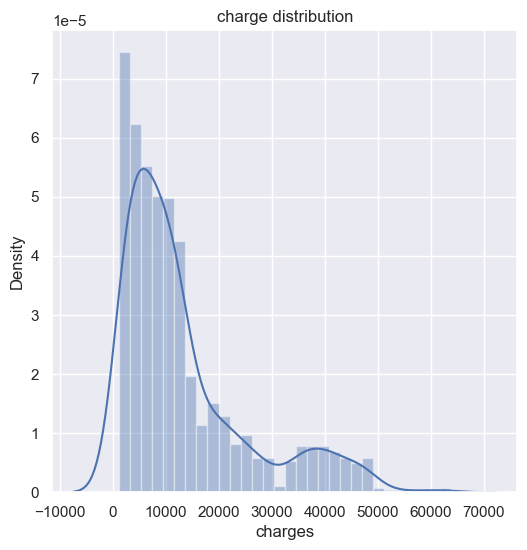

In [359]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset["charges"])
plt.title("charge distribution")
plt.show()

In [360]:
dataset.replace({"sex":{"male":0,"female":1}}, inplace=True)
dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [361]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [362]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


In [363]:
X=dataset.drop("charges",axis=1)
Y=dataset["charges"]

In [364]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [365]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [366]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=3)

In [367]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [368]:
regresso=LinearRegression()

In [369]:
regresso.fit(X_train,Y_train)

LinearRegression()

In [370]:
X_train_pred=regresso.predict(X_train)
r2_score(X_train_pred,Y_train)

0.6717962504722261

In [371]:
X_test_pred=regresso.predict(X_test)
r2_score(X_test_pred,Y_test)

0.6597962372772977

In [372]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regresso.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3502.43698689]
The insurance cost is USD  3502.436986894735


d:\conda\envs\trainy2_O\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
